In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import Axes3D
from sympy import integrate
from scipy.optimize import root_scalar
from scipy.integrate import quad

Text(0.5, 1.0, 'Evolution de l altitude d Ariane 5 en fonction du temps ')

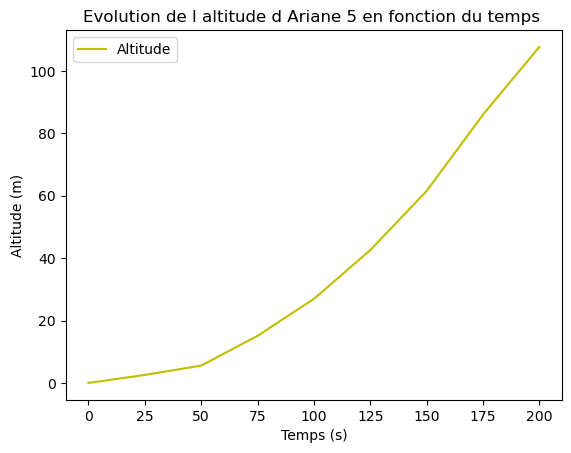

In [61]:
xp = [0,25,50,75,100,125,150,175,200]
yp = [0, 2.546, 5.538,15.084 ,26.923, 42.552 , 61.538, 86,107.692]

x = np.linspace(0, 200, 600)

y = np.interp(x, xp, yp) # interpolation linéaire

plt.plot(x, y, "y-",label="Altitude")
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('Altitude (m)')
plt.title('Evolution de l altitude d Ariane 5 en fonction du temps ')

Text(0.5, 1.0, 'Evolution de la vitesse d Ariane 5 en fonction du temps ')

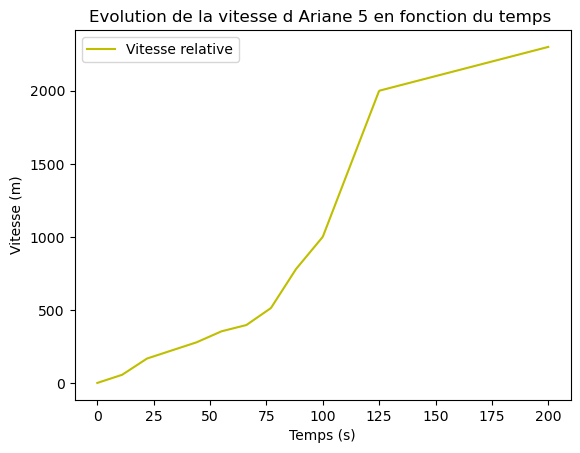

In [67]:
xp = [0,11,22,33,44,55,66,77,88,100,125,200]
yp = [0,55.55 ,166.66,222,277.76,353,395.016,512.5,777,1000,2000,2300]

x = np.linspace(0, 200, 600)

y = np.interp(x, xp, yp) # interpolation linéaire

plt.plot(x, y, "y-", label="Vitesse relative")
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('Vitesse (m)')
plt.title('Evolution de la vitesse d Ariane 5 en fonction du temps ')

In [95]:
def temperature(Z, T0, Tz, T1, Tz1, Z1, Tz2, Z2,T3,Tz3):
    #Troposphère
    if 0 <= Z < 11019 :
        T = T0 + Tz*Z
    
    elif 11019 <= Z < 20063 :
        T = T1
        
    elif 20063 <= Z < 32162 :
        T = T1 + Tz1*(Z-Z1)
        
    elif 32162<= Z < 47350 : 
        T = T2 + Tz2*(Z-Z2)
        
    elif 47350 <= Z < 51413 :
        T = T3
    
    elif 51413 <= Z < 71000 :
        T = T3 - Tz3*(Z-Z3)
        
    return T
    
def vitesse_son(gamma,R,T):

    a = np.sqrt(gamma*R*T)
    return a

In [97]:
gamma = 1.4
# Altitudes de 0 à 70000 mètres
T0 = 288.15 #Kelvin
Tz = -0.0065
R = 287.04 #Jkg−1K−1
p0 = 101325 #Pa
g = 9.81 # m/s²
Tz1 = 0.001 #K/m ou 2,8K/km
T1 = 216.65 # Kelvin, température à la tropopause
Z1 = 20063 # mètre, altitude à la tropopause
Tz2 =  0.0028   #K/m ou 2,8K/km
T2 = 228.65 #Kelvin, Température à la stratopause
Z2 = 32162 #mètre, altitude à la stratopause
T3 = 270.65
Tz3 = 0.0028
Z3 = 51413

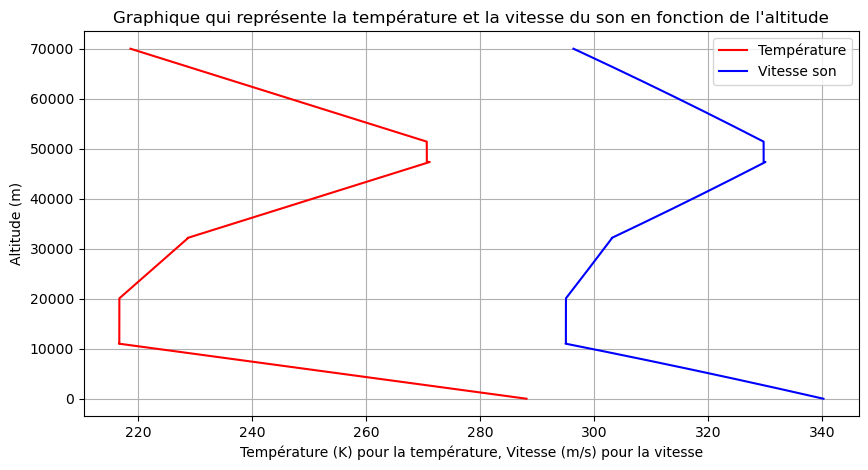

In [107]:
Z = np.linspace(0, 70000, 7000)



temperatures = []

# Calcul des températures pour chaque altitude
for z in Z:
    T = temperature(z, T0, Tz, T1, Tz1, Z1, Tz2, Z2,T3,Tz3)
    if T is not None:
        temperatures.append(T)

X = np.linspace(0, 70000, 7000)
vitesse_son_list = []
for x in X: 
   
    T = temperature(x, T0, Tz, T1, Tz1, Z1, Tz2, Z2,T3,Tz3)
    a = vitesse_son(gamma,R,T)
    vitesse_son_list.append(a)

# Tracer la température en fonction de l'altitude
plt.figure(figsize=(10, 5))
plt.plot(temperatures,Z, label="Température", color="red")
plt.plot(vitesse_son_list,Z, label="Vitesse son", color="b")
plt.xlabel("Température (K) pour la température, Vitesse (m/s) pour la vitesse")
plt.ylabel("Altitude (m)")
plt.title("Graphique qui représente la température et la vitesse du son en fonction de l'altitude")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
hline 
vlines 


## Evolution du nombre de Mach d'Ariane 

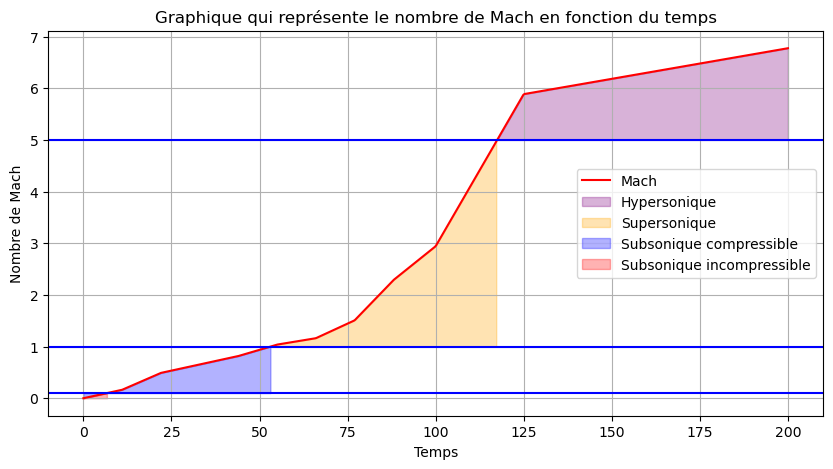

In [144]:
B =  np.linspace(0,200 , 600)
Nbr_mach = []
for b in B : 
    xp = [0,11,22,33,44,55,66,77,88,100,125,200]
    yp = [0,55.55 ,166.66,222,277.76,353,395.016,512.5,777,1000,2000,2300]
    
    y = np.interp(b, xp, yp) # interpolation linéaire
    T = temperature(b, T0, Tz, T1, Tz1, Z1, Tz2, Z2,T3,Tz3)
    a = vitesse_son(gamma,R,T)
    mach =y /a
    Nbr_mach.append(mach)
    
plt.figure(figsize=(10, 5))
plt.plot(B,Nbr_mach, label="Mach", color="red")

plt.fill_between(B, Nbr_mach, 5, where=np.array(Nbr_mach) >= 5, color='purple', alpha=0.3, label="Hypersonique")
plt.fill_between(B, Nbr_mach, 1, where=(np.array(Nbr_mach) >= 1) & (np.array(Nbr_mach) <= 5), color='orange', alpha=0.3, label="Supersonique")
plt.fill_between(B, Nbr_mach, 0.1, where=(np.array(Nbr_mach) <= 1) & (np.array(Nbr_mach) <= 5), color='blue', alpha=0.3, label="Subsonique compressible")
plt.fill_between(B, Nbr_mach, 0, where=(np.array(Nbr_mach) <=0.1 ) & (np.array(Nbr_mach) <= 5), color='red', alpha=0.3, label="Subsonique incompressible")
plt.axhline(y = 1, color = 'b', linestyle = '-') 
plt.axhline(y = 5, color = 'b', linestyle = '-') 
plt.axhline(y = 0.1, color = 'b', linestyle = '-') 
plt.xlabel("Temps")
plt.ylabel("Nombre de Mach")

plt.title("Graphique qui représente le nombre de Mach en fonction du temps")
plt.grid(True)
plt.legend()
plt.show()

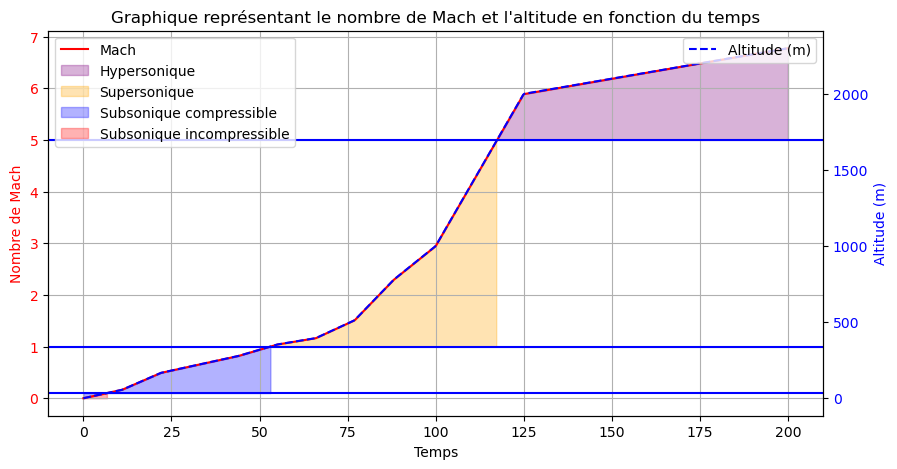

In [148]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des paramètres (exemple)
B = np.linspace(0, 200, 600)
Nbr_mach = []
alt = np.linspace(0, 100000, 600)

for b in B:
    xp = [0, 11, 22, 33, 44, 55, 66, 77, 88, 100, 125, 200]
    yp = [0, 55.55, 166.66, 222, 277.76, 353, 395.016, 512.5, 777, 1000, 2000, 2300]
    
    y = np.interp(b, xp, yp)  # interpolation linéaire
    
    
    # Calcul du nombre de Mach
    T = temperature(b, T0, Tz, T1, Tz1, Z1, Tz2, Z2, T3, Tz3)  # Fonction non définie ici
    a = vitesse_son(gamma, R, T)  # Fonction non définie ici
    mach = y / a
    Nbr_mach.append(mach)

# Création de la figure et des axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Premier axe : Nombre de Mach
ax1.plot(B, Nbr_mach, label="Mach", color="red")
ax1.fill_between(B, Nbr_mach, 5, where=np.array(Nbr_mach) >= 5, color='purple', alpha=0.3, label="Hypersonique")
ax1.fill_between(B, Nbr_mach, 1, where=(np.array(Nbr_mach) >= 1) & (np.array(Nbr_mach) <= 5), color='orange', alpha=0.3, label="Supersonique")
ax1.fill_between(B, Nbr_mach, 0.1, where=(np.array(Nbr_mach) <= 1), color='blue', alpha=0.3, label="Subsonique compressible")
ax1.fill_between(B, Nbr_mach, 0, where=(np.array(Nbr_mach) <= 0.1), color='red', alpha=0.3, label="Subsonique incompressible")
ax1.axhline(y=1, color='b', linestyle='-')
ax1.axhline(y=5, color='b', linestyle='-')
ax1.axhline(y=0.1, color='b', linestyle='-')

ax1.set_xlabel("Temps")
ax1.set_ylabel("Nombre de Mach", color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.legend(loc="upper left")
ax1.grid(True)

# Deuxième axe : Altitude en mètres
ax2 = ax1.twinx()  # Crée un deuxième axe sur le même graphique
ax2.plot(B, altitudes, label="Altitude (m)", color="blue", linestyle="dashed")
ax2.set_ylabel("Altitude (m)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.legend(loc="upper right")

plt.title("Graphique représentant le nombre de Mach et l'altitude en fonction du temps")
plt.show()
